In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

from sklearn.linear_model import LogisticRegression

In [2]:
train=pd.read_csv('https://raw.githubusercontent.com/katieeehan20/Titanic_Project_Groupwork/main/train.csv')

train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
test=pd.read_csv('https://raw.githubusercontent.com/katieeehan20/Titanic_Project_Groupwork/main/test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
def clean(train):
    train = train.drop(["Ticket", "Cabin", "Name", "PassengerId"], axis=1)
    cols = ["SibSp", "Parch", "Fare", "Age"]
    for col in cols:
        train[col].fillna(train[col].median(), inplace=True)
    train.Embarked.fillna("U", inplace=True)
    return train
train = clean(train)
test = clean(test)

In [44]:
train.head(60)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
5,0,3,1,28.0,0,0,8.4583,1
6,0,1,1,54.0,0,0,51.8625,2
7,0,3,1,2.0,3,1,21.0750,2
8,1,3,0,27.0,0,2,11.1333,2
9,1,2,0,14.0,1,0,30.0708,0


In [6]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cols = ["Sex", "Embarked"]

for col in cols:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])
    print(le.classes_)

train.head(5)

['female' 'male']
['C' 'Q' 'S' 'U']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [8]:
only=train.loc[:,["Survived", "Pclass", "Age", "Sex"]]
only

,Survived,Pclass,Age,Sex
0,0,3,22.0,1
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,1
...,...,...,...,...
886,0,2,27.0,1
887,1,1,19.0,0
888,0,3,28.0,0
889,1,1,26.0,1


In [9]:
# only showing the columns where survived=1
#maybe  not required. Focus on only one variable

onlysurvived=only[only["Survived"]==1]
onlysurvived

,Survived,Pclass,Age,Sex
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
8,1,3,27.0,0
9,1,2,14.0,0
...,...,...,...,...
875,1,3,15.0,0
879,1,1,56.0,0
880,1,2,25.0,0
887,1,1,19.0,0


In [11]:
only.describe()

,Survived,Pclass,Age,Sex
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.647587
std,0.486592,0.836071,13.019697,0.477990
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,22.000000,0.000000
50%,0.000000,3.000000,28.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000
max,1.000000,3.000000,80.000000,1.000000


In [12]:
# this summarizes all the columns (numeric only)

only.describe(include='all')

,Survived,Pclass,Age,Sex
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.647587
std,0.486592,0.836071,13.019697,0.477990
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,22.000000,0.000000
50%,0.000000,3.000000,28.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000
max,1.000000,3.000000,80.000000,1.000000


In [13]:
only.describe()

,Survived,Pclass,Age,Sex
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.647587
std,0.486592,0.836071,13.019697,0.477990
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,22.000000,0.000000
50%,0.000000,3.000000,28.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000
max,1.000000,3.000000,80.000000,1.000000


In [14]:
test.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.636364,29.599282,0.447368,0.392344,35.576535,1.401914
std,0.841838,0.481622,12.703770,0.896760,0.981429,55.850103,0.854496
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,1.000000
50%,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200,2.000000
75%,3.000000,1.000000,35.750000,1.000000,0.000000,31.471875,2.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


In [15]:
# this summarizes all the columns (numeric)

test.describe(include='all')

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.636364,29.599282,0.447368,0.392344,35.576535,1.401914
std,0.841838,0.481622,12.703770,0.896760,0.981429,55.850103,0.854496
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,1.000000
50%,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200,2.000000
75%,3.000000,1.000000,35.750000,1.000000,0.000000,31.471875,2.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


In [16]:
only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   Sex       891 non-null    int32  
dtypes: float64(1), int32(1), int64(2)
memory usage: 24.5 KB


In [17]:
only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   Sex       891 non-null    int32  
dtypes: float64(1), int32(1), int64(2)
memory usage: 24.5 KB


In [18]:
train.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [19]:
test.dtypes

Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [20]:
train.shape[0]

891

In [21]:
test.shape[0]

418

In [22]:
train.shape[1]

8

In [23]:
test.shape[1]

7

In [24]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [25]:
test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [26]:
train.index

RangeIndex(start=0, stop=891, step=1)

In [27]:
test.index

RangeIndex(start=0, stop=418, step=1)

In [28]:
# gives the total number of passengers, as in line [14]

train.Survived.count()

891

In [29]:
# 1- number of people survived

train["Survived"].value_counts().head()

0    549
1    342
Name: Survived, dtype: int64

In [30]:
train.Sex.count()

891

In [31]:
train["Sex"].value_counts().head()

1    577
0    314
Name: Sex, dtype: int64

In [32]:
len(train)

891

In [33]:
class1 = train.loc[train.Pclass == 1]["Survived"]
rate_class1 = round(sum(class1)/len(class1)*100,2)

print("Percent of first class who survived: %", rate_class1)

Percent of first class who survived: % 62.96


In [34]:
class2 = train.loc[train.Pclass == 2]["Survived"]
rate_class2 = round(sum(class2)/len(class2)*100,2)

print("Percent of second class who survived: %", rate_class2)

Percent of second class who survived: % 47.28


In [35]:
class3 = train.loc[train.Pclass == 3]["Survived"]
rate_class3 = round(sum(class3)/len(class3)*100,2)                    # not sure if corrrect, len(train)??

print("Percent of third class who survived: %", rate_class3)

Percent of third class who survived: % 24.24


C:\Users\erick\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Survivors by Ticket Class')

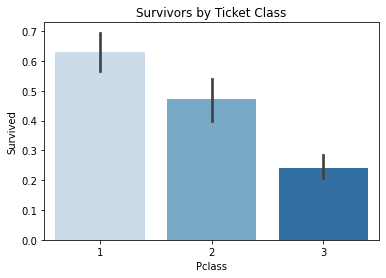

In [36]:
sns.barplot( train["Pclass"], train["Survived"], palette= "Blues",data=train) 
plt.title("Survivors by Ticket Class")

In [45]:
women_total = train.loc[train.Sex == '0']
women_survived = train.loc[train.Sex == '0']["Survived"]

rate_women = round(women_survived/women_total*100,2)

print("Percent of women who survived: %", rate_women)

Percent of women who survived: % Empty DataFrame
Columns: [Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked]
Index: []


In [38]:
men = train.loc[train.Sex == 'male']["Survived"]
rate_men = round(sum(men)/len(men)*100,2)

print("Percent of men who survived: %", rate_men)

ZeroDivisionError: division by zero

C:\Users\erick\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'Rectangle' object has no property 'labels'

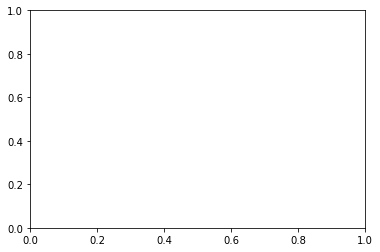

In [47]:
sns.barplot( train["Sex"], train["Survived"], palette="Blues", data=train,)
plt.title("Survivors by Sex")

In [ ]:
#Ericka & Liz
plt.title("Passengers by Age")

sns.barplot(train["Age"], train["Survived"], palette = "Blues", data = train) 

In [ ]:
#Ericka
train["Age"].describe()

In [ ]:
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['Age'] = pd.cut(train["Age"], bins, labels = labels)
test['Age'] = pd.cut(test["Age"], bins, labels = labels)
plt.title("Survivors by Age")

sns.barplot( train["Age"], train["Survived"], palette = "Blues", data=train) 

In [ ]:
#Ericka
allsurvivors=train[train["Survived"]==1]
del allsurvivors["Survived"]
allsurvivors.head()

In [ ]:
#Ericka
allsurvivors["Age"].describe()

In [ ]:
#Ericka & Liz
plt.title("No Survivors by Age")

sns.barplot( train["Age"], train["Survived"], palette = "Blues", data=train) 

In [ ]:
#Ericka
nosurvivors=train[train["Survived"]==0]
del nosurvivors["Survived"]
nosurvivors.head()

In [ ]:
#Ericka
nosurvivors["Age"].describe()

In [ ]:
only2=onlysurvived.loc[:,["Sex", "Survived", "Pclass", "Age"]]
only2

In [ ]:
#Ericka
corr = train.corr()
plt.title("Training Dataset Correlational Heatmap")
sns.heatmap(corr, cmap="Blues", annot=True)

In [ ]:
#Ericka
#correlation between all survivors age and class
corr = onlysurvived.corr()
#del onlysurvived["Survived"]
plt.title("Select Variable Correlational Heatmap")
sns.heatmap(corr, cmap="Blues", annot=True)

In [ ]:
#Ericka
corr = allsurvivors.corr()
plt.title("Survivors Correlational Heatmap")
sns.heatmap(corr, cmap="Blues", annot=True)

In [ ]:
#Ericka
corr = nosurvivors.corr()
plt.title("No Survivors Correlational Heatmap")
sns.heatmap(corr, cmap="Blues", annot=True)

In [ ]:
train=pd.read_csv('https://raw.githubusercontent.com/katieeehan20/Titanic_Project_Groupwork/main/train.csv')

#Area plot
train.plot.area()
#Box plot
train.plot.box()

In [ ]:
train["Age"].astype(int)

In [ ]:
from pandas.plotting import parallel_coordinates

pd.plotting.andrews_curves(train, 'Name')

In [ ]:
train['Age'].astype(float)
display(train.dtypes) 
train.head()

In [ ]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
output_notebook()

fig = figure(plot_width=400, plot_height=400, title="Disposition vs Weight")

fig.square(
           x=train["Age"],
           y=train["Survivors"],
           size=square_sizes, alpha=0.5,
           line_color="orange", fill_color="orange"
        )

fig.xaxis.axis_label="Disposition"
fig.yaxis.axis_label="Weight"

show(fig)

In [ ]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
output_notebook()

fig = figure(title='My Tutorial Progress',
             plot_height=400, plot_width=700,
             x_axis_label='Age', y_axis_label='Survivors',
             x_minor_ticks=2, y_range=(0, 6000)
            )

fig.vbar(x = train, bottom=0, 
         color='blue', width=0.75, 
         )

show(fig)

In [ ]:
train =pd.read_csv('https://raw.githubusercontent.com/katieeehan20/Titanic_Project_Groupwork/main/train.csv')

pd.plotting.andrews_curves(train_Name)

In [ ]:
train['Age'].astype(float)
display(train.dtypes) 
train.head()

from pandas.plotting import parallel_coordinates

train=pd.read_csv('https://raw.githubusercontent.com/katieeehan20/Titanic_Project_Groupwork/main/train.csv')

plt.figure();

parallel_coordinates(int(train), 'Age');


In [ ]:
#Combining testing and training data

train_test = [train, test]

In [ ]:
# Changing sex to numbers for computation purposes later
#Aus

for dataset in train_test:
    dataset["Sex"] = dataset["Sex"].map({'female': 1, 'male': 0}).astype(int)

In [ ]:
# Note how sex is either 0 or 1 in the output
train.head()

In [ ]:
#Adding random ages for null age

for dataset in train_test:
    #basic data collection
    average_age = dataset["Age"].mean()
    std_age = dataset["Age"].std()
    null_count = dataset["Age"].isnull().count()
    
    #calculation
    null_random_fill = np.random.randint(average_age - std_age, average_age + std_age, size=null_count)
    # Data fill in
    dataset["Age"][np.isnan(dataset["Age"])] = null_random_fill
    dataset["Age"] = dataset["Age"].astype(int)

#Establishing age bins for grouping
train["AgeBin"] = pd.cut(train["Age"], 5)

print(train[["AgeBin", "Survived"]].groupby(["AgeBin"], as_index=False).mean())

In [ ]:
#Establishing age bins

for dataset in train_test:
    dataset.loc[ dataset["Age"] <= 13, "Age"] = 0
    dataset.loc[ (dataset["Age"] > 13) & (dataset["Age"] <= 27), "Age"] = 1
    dataset.loc[ (dataset["Age"] > 27) & (dataset["Age"] <= 40), "Age"] = 2
    dataset.loc[ (dataset["Age"] > 40) & (dataset["Age"] <= 53), "Age"] = 3
    dataset.loc[ (dataset["Age"] > 53) & (dataset["Age"] <= 67), "Age"] = 4
    dataset.loc[ dataset["Age"] > 67, "Age"] = 5

In [ ]:
train.head()

In [ ]:
#Eliminating features for predictions
dropped_feat = ["Name", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"]
train_dropped = train.drop(dropped_feat, axis=1)
test_dropped = test.drop(dropped_feat, axis=1)

train_dropped = train_dropped.drop(["PassengerId", "AgeBin"],axis=1)

In [ ]:
#Establishing data for predictions

x_training = train_dropped.drop("Survived", axis=1)
y_training = train_dropped["Survived"]
x_testing = test_dropped.drop ("PassengerId", axis=1).copy()

x_training.shape, y_training.shape, x_testing.shape

In [ ]:
eq = LogisticRegression()
eq.fit(x_training,y_training)
logistic_reg = eq.predict(x_testing)
final_log_reg = round( eq.score(x_training, y_training) * 100, 2)
print(str(final_log_reg) + " percent")

In [ ]:
Data_submission_format = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": logistic_reg})

In [ ]:
Data_submission_format
